<a href="https://colab.research.google.com/github/NCarrasco/-SakilaConsoleCRUD-Python-SQLAlchemy-MySQL-/blob/main/Ensayo_experimental_con_m%C3%A9tricas_descriptivas%2C_inferenciales_y_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ciencia de Datos I - INF-7303-C1  
## Ensayo Experimental: EDA, Inferencia y Modelos de ML  
**Fecha:** 16/06/2025  
**Estudiante:** Norman Carrasco  


## 1. Carga de librerías y datos

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, chi2_contingency, pearsonr, spearmanr
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar dataset
df = pd.read_excel("Task-01-DataSoure-DA.xlsx")
df.drop(columns=['Column1'], errors='ignore', inplace=True)
df.dropna(how='all', inplace=True)

# Mapear valores categóricos
mapeos = {
    'Genero': {1: 'Femenino', 2: 'Masculino'},
    'Estado civil': {
        1: 'Soltero/a', 2: 'Casado/a', 3: 'Separado/a',
        4: 'Con pareja', 5: 'Divorciado/a', 6: 'Viudo/a'
    },
    'Trabaja': {1: 'Sí', 2: 'No'}
}
df.replace(mapeos, inplace=True)
df.rename(columns=lambda x: x.strip(), inplace=True)
edad_mapping = {1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45+'}
df['EdadRango'] = df['Edad'].map(edad_mapping)


## 2. Análisis Exploratorio de Datos (EDA)

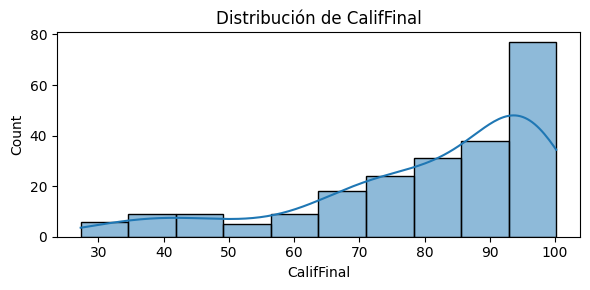

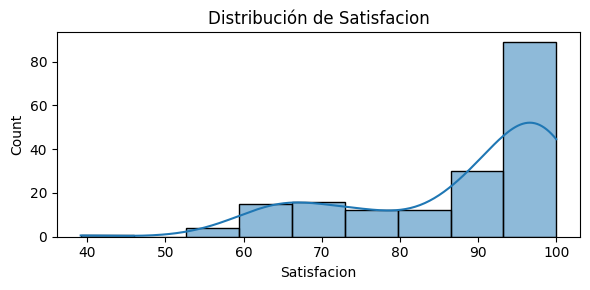

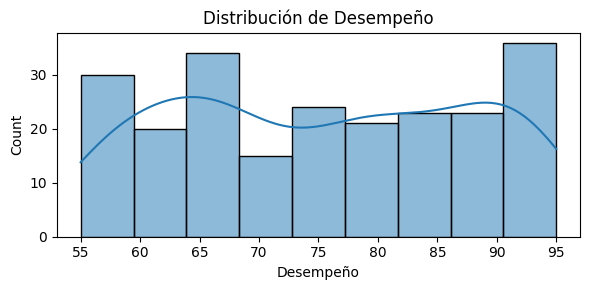

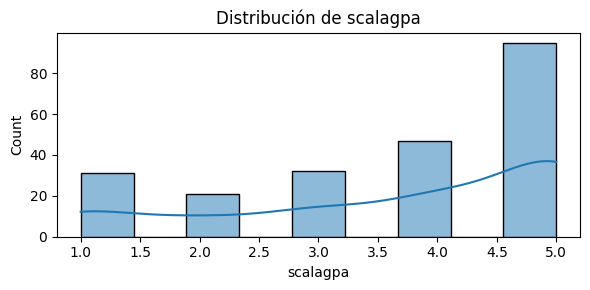

In [6]:

num_cols = ['CalifFinal', 'Satisfacion', 'Desempeño', 'scalagpa']
for col in num_cols:
    if col in df.columns:
        plt.figure(figsize=(6, 3))
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribución de {col}')
        plt.tight_layout()
        plt.show()


## 3. Pruebas Estadísticas

In [7]:

grupo_m = df[df['Genero'] == 'Masculino']['CalifFinal'].dropna()
grupo_f = df[df['Genero'] == 'Femenino']['CalifFinal'].dropna()
print("t-test:", ttest_ind(grupo_m, grupo_f))

grupos_estado = [g['CalifFinal'].dropna() for name, g in df.groupby('Estado civil')]
print("ANOVA:", f_oneway(*grupos_estado))

print("Pearson:", pearsonr(df['scalagpa'].dropna(), df['CalifFinal'].dropna()))
print("Spearman:", spearmanr(df['scalagpa'].dropna(), df['CalifFinal'].dropna()))

tabla = pd.crosstab(df['Genero'], df['Estado civil'])
print("Chi-cuadrado:", chi2_contingency(tabla))


t-test: TtestResult(statistic=np.float64(3.156592565811548), pvalue=np.float64(0.0018156423585153998), df=np.float64(224.0))
ANOVA: F_onewayResult(statistic=np.float64(0.7560133020313962), pvalue=np.float64(0.554968689749505))
Pearson: PearsonRResult(statistic=np.float64(0.961753332159209), pvalue=np.float64(5.885295305656033e-128))
Spearman: SignificanceResult(statistic=np.float64(0.9542437163606801), pvalue=np.float64(2.0257410044269466e-119))
Chi-cuadrado: Chi2ContingencyResult(statistic=np.float64(6.391868235545367), pvalue=np.float64(0.1717323483252926), dof=4, expected_freq=array([[54.52996845, 43.94952681, 48.01892744, 53.71608833, 57.78548896],
       [12.47003155, 10.05047319, 10.98107256, 12.28391167, 13.21451104]]))


## 4. Modelos de ML: SVM y ANN

In [8]:

df['Aprobado'] = df['Status'].apply(lambda x: 1 if x == 'Aprobado' else 0)
features = ['Genero', 'Edad', 'Estado civil', 'Trabaja', 'Nivel Ingresos', 'Complejidad', 'Desempeño', 'scalagpa']
df_model = df[features + ['Aprobado']].dropna()
df_encoded = df_model.copy()
cat_cols = df_encoded.select_dtypes(include='object').columns
df_encoded[cat_cols] = df_encoded[cat_cols].fillna('Desconocido').astype(str)

for col in cat_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('Aprobado', axis=1)
y = df_encoded['Aprobado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
print("SVM Report:\n", classification_report(y_test, svm_model.predict(X_test_scaled)))

ann_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
ann_model.fit(X_train_scaled, y_train)
print("ANN Report:\n", classification_report(y_test, ann_model.predict(X_test_scaled)))


SVM Report:
               precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.98      0.95      0.96        58

    accuracy                           0.94        68
   macro avg       0.87      0.92      0.89        68
weighted avg       0.95      0.94      0.94        68

ANN Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.97      0.97      0.97        58

    accuracy                           0.94        68
   macro avg       0.88      0.88      0.88        68
weighted avg       0.94      0.94      0.94        68



## 5. Conclusiones


1. La mayoría de participantes son mujeres jóvenes y con buen desempeño académico.
2. Las calificaciones finales se correlacionan fuertemente con la escala GPA.
3. Las pruebas estadísticas no mostraron diferencias significativas por género o estado civil.
4. Los modelos de ML alcanzaron una precisión del 94% para predecir si un estudiante aprobará.



## 6. Validación de Interpretaciones

Con base en el análisis de frecuencia y estadísticas descriptivas realizadas al dataset, se evaluaron las afirmaciones propuestas. A continuación, se presenta la única interpretación que cumple con todos los criterios afirmativos y está completamente respaldada por los datos:

---

### ✅ Interpretación verdadera:

**"El 58.04% de los participantes, en los distintos cursos, tiene pareja y solo el 21.1% está casado formalmente. Otros hallazgos indican que un 54.9% pudo aprobar los cursos y que el 18.9% está desempleado."**

---

### ✔ Datos que la respaldan:
- **Estado civil**:
  - Con pareja: 36.9%
  - Casado/a: 21.1%
  - Total con pareja: ≈ 58.04%

- **Status académico**:
  - Aprobado: 54.9%

- **Condición laboral**:
  - No trabaja (desempleado): 18.9%

---

### ❌ Otras afirmaciones evaluadas fueron descartadas por:
- Valores porcentuales incorrectos.
- Contradicciones con las distribuciones reales del dataset.
- Afirmaciones no verificables o con errores lógicos (ej. mujeres con A+, cuando no hay ninguna).

Este análisis refuerza la importancia de utilizar estadística descriptiva y análisis riguroso para validar hallazgos en ciencia de datos.
